In [2]:
import pandas as pd
def load_prepare_data(path):
  """
  Función para cargar y procesar datos para el ejercicio.
  """
  df = pd.read_csv(path,sep=",")
  map_classes = {
    "religion":1,
    "age":1,
    "ethnicity":1,
    "gender":1,
    "other_cyberbullying":1,
    "not_cyberbullying":0,
  }
  df["cyberbullying"] = df.cyberbullying_type.map(map_classes)
  return df[["tweet_text","cyberbullying"]].copy()

# Ejercicio


En este ejercicio vamos a trabajar con un conjunto de datos procedente de medios sociales online.

Uno de los mayores problemas en el internet de hoy en día es la presencia de actitudes negativas hacia algunos colectivos en relación a su etnia, género, religión o ideología política. En este ejercicio trabajaremos con un conjunto de datos reales, etiquetados manualmente, procedentes de la plataforma [Kaggle](https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification/data). Originalmente, a cada documento del dataset se le asignó una de las siguientes categorías:
- *religion*
- *age*
- *ethnicity*
- *gender*
- *other_cyberbullying*
- *not_cyberbullying*


El objetivo inicial del dataset era su uso para entrenar un modelo capaz de detectar el tipo de contenido de odio presente en internet según el colectivo al que se atacaba. En este caso, para simplificar el ejercicio, se ha generado una función `load_prepare_data()` que cambia las categorías del dataset obteníendose al final 2 categorías con valor 1 o 0, indicando si el tweet tiene contenido de odio

Para el ejercicio debéis entrenar diferentes modelos de clasificación que permitan clasificar correctamente los tweets. Para ello será necesario crear y utilizar funciones de preprocesado de datos similares a las vistas en clase, aplicar estrategias de vectorización de trextos como TF-IDF o embeddings, y entrenar/evaluar modelos de clasificación. Para que os sirva de orientación, los criterios de evaluación del ejercicio serán los siguientes:

-	**Análisis exploratorio, pre-procesado y normalización de los datos (30%)**:
        -	El ejercicio deberá contener un análisis exploratorio de los datos como número de documentos, gráficas de distribución de longitudes y/o wordclouds, entre otros análisis que se os pudieran ocurrir. Vuestros ejercicios deberán incorporar al menos los análisis exploratorios vistos en clase.

    -	También tendréis que tener funciones para normalizar textos que permitan eliminar palabras vacías, quitar símbolos de puntuación y lematizar o hacer stemming.  

-	**Vectorización de textos (40%)**

    En clase hemos visto diferentes estrategias de vectorización como TF-IDF y Word Embeddings. Será necesario incorporar características adicionales como el sentimiento o características léxicas.

-	**Entrenamiento y validación del sistema (30%)**
  -	En el proceso de entrenamiento del modelo tendréis que testear al menos 3 modelos de clasificación. El procedimiento debe ser similar al visto en clase, en el que primero estimábamos el rendimiento de varios algoritmos de forma general, para posteriormente seleccionar el mejor para ajustar los hiperparámetros.


**Nota 1**: El ejercicio propuesto es similar a los ejercicios de clasificación visto en clase, por lo que es importante que documentéis y expliquéis adecuadamente (con vuestras palabras) los procesos llevados a cabo en el ejercicio. No hacerlo puede llegar a penalizar hasta 1 punto en la calificación final.

**Nota 2**: Cualquier cálculo adicional a los vistos en clase (visualizaciones, nuevas características añadidas al modelo...) será valorado positivamente en la calificación.

## 0. Imports


In [3]:
import pandas as pd

## 1. Obtención del corpus
Para la obtención de los datos teneis disponible la función `load_prepare_data()`. Esta función prepara los datos del ejercicio en formato Pandas dataframe para que podais realizarlo.

In [4]:
path_data = "https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/cyberbullying_tweets.csv"
# Path de datos alternativos en caso de que el anterior no funcione (al estar alojado en github puede haber limitaciones
# en la descarga.
# path_data = "https://zenodo.org/records/10938455/files/cyberbullying_tweets.csv?download=1"
dataset = load_prepare_data(path_data)

In [5]:
dataset.head(4)

,tweet_text,cyberbullying
0,"In other words #katandandre, your food was cra...",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0


## 2. Análisis exploratorio

In [6]:
dataset.dtypes

tweet_text       object
cyberbullying     int64
dtype: object

In [7]:
# Voy a convertirlo a listas
dataset['tweet_text'] = dataset['tweet_text'].to_list()
print(f"El corpus contiene un total de {len(dataset['tweet_text'])} textos.")

El corpus contiene un total de 47692 textos.


In [8]:
# Revisar la existencia de textos duplicados
print(len(dataset.loc[dataset['tweet_text'].duplicated()]))
# 1675 filas estan duplicadas

1675


In [9]:
# Quitar duplicados
print(f"Corpus antes de quitar duplicados {len(dataset)}")
dataset = dataset.loc[~dataset['tweet_text'].duplicated()]
print(f"Corpus despues de quitar duplicados {len(dataset)}")

Corpus antes de quitar duplicados 47692
Corpus despues de quitar duplicados 46017


In [10]:
dataset.isna().sum() # Verificar que no existan valores na en ninguna de las columnas

tweet_text       0
cyberbullying    0
dtype: int64

In [11]:
# Desbalance en el dataset
dataset['cyberbullying'].value_counts()

cyberbullying
1    38080
0     7937
Name: count, dtype: int64

Es necesario pasar a **string** los tweets para facilitar el proceso de modificación y también para llevar a cabo la visualización inicial de worldcloud.

In [12]:
from wordcloud import WordCloud
cyberbullying_0 = ",".join(dataset.loc[dataset["cyberbullying"] == 0]["tweet_text"].to_list())
cyberbullying_1 = ",".join(dataset.loc[dataset["cyberbullying"] == 1]["tweet_text"].to_list())


In [15]:
nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')
wordcloud = WordCloud(background_color='white', max_words=5000, contour_width=0,
                       contour_color='steelblue', stopwords=en_stopwords, normalize_plurals=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


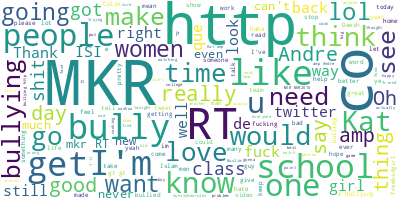

In [16]:
# Genera el wordcloud
wordcloud.generate(cyberbullying_0)
# Visualizarlo
wordcloud.to_image()

Se observa una alta persencia de URLs (presencia de https y co), asi como la palabra MKR y otras que no dan mucha información como get y twitter. Además de algunos adjetivos que sean probablemente utiles como good.

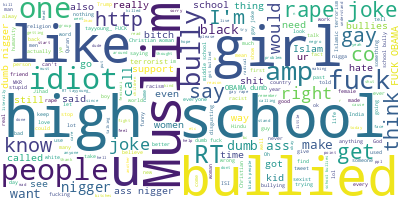

In [17]:
wordcloud.generate(cyberbullying_1)
wordcloud.to_image()

Se observan palabras más toxicas como, rape, nigger, idiot, hate, gay también se observa palabras a modificar como https y co.

Antes de pasar al preprocesado y Normalización vamos a definir una nueva variable que represente la longitud del texto y ver su distribución, con la intención de ver si los mensajes de cyberbullying son más cortos o más largos, con la intención de que pueda ser una característica utilizada en nuestro modelo de clasificación.

<Figure size 1400x1200 with 0 Axes>

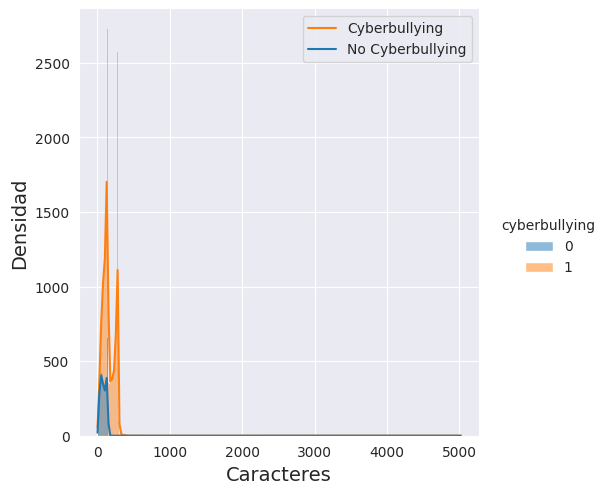

In [18]:
dataset['char_len'] = dataset['tweet_text'].apply(lambda x: len(x))
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(14, 12))
sns.set_style("darkgrid")
sns.displot(data=dataset, x="char_len", hue="cyberbullying", kde=True, legend=True)
plt.legend(["Cyberbullying", "No Cyberbullying"])
plt.xlabel('Caracteres', fontsize= 14)
plt.ylabel('Densidad', fontsize= 14)
plt.show()

Observamos que hay observaciones que tienen demasiados caracteres vamos a explorar más a fondo.

In [19]:
import numpy as np
print(dataset['char_len'].describe()) # Existe una observacion con 5018 caracteres
dataset.loc[dataset['char_len'] > np.percentile(dataset['char_len'], 99)].sort_values(by='char_len', ascending=False)

count    46017.000000
mean       138.108134
std         85.863595
min          1.000000
25%         80.000000
50%        125.000000
75%        187.000000
max       5018.000000
Name: char_len, dtype: float64


,tweet_text,cyberbullying,char_len
29205,is feminazi an actual word with a denot…\r\n@N...,1,5018
24516,@NICKIMINAJ: #WutKinda\r\nAt this rate the MKR...,1,4197
30752,I don't retreat.\r\nyessssssss http://t.co/Td9...,1,3138
44035,You so black and white trying to live like a n...,1,1869
1317,@EurekAlertAAAS: Researchers push to import to...,0,1809
...,...,...,...
36905,Union City woman on her way to the principal's...,1,285
35919,have never understood girls or women like this...,1,285
16386,If don't necessarily like me and don't care to...,1,285
22918,"You idiot, as a child I played sports with Jew...",1,285


Leeyendo los tweets es claro que hay algunos tweets individuales de más de 280 cáracteres son solo un tweet, no estoy seguro si sea por prefijos que realmente no existén en el tweet actual como "&amp", de cualquier manera, no podría hacer nada más que eliminarlos a menos que este dispuesto a modificar la variable objetivo de `cyberbullying`, lo cambiaría la **verdad** de nuestro modelo y haría en parte las metricas de evaluación del modelo invalidas. <br>
<br>
Por lo que eliminaré todos los tweets que tengan más de 280 carácteres. Ya que solo representan 703 observaciones.

In [ ]:
print(dataset.loc[dataset['char_len'] > 280].shape)
dataset = dataset.loc[~(dataset["char_len"] > 280)] # 703 tweets

<Figure size 1400x1200 with 0 Axes>

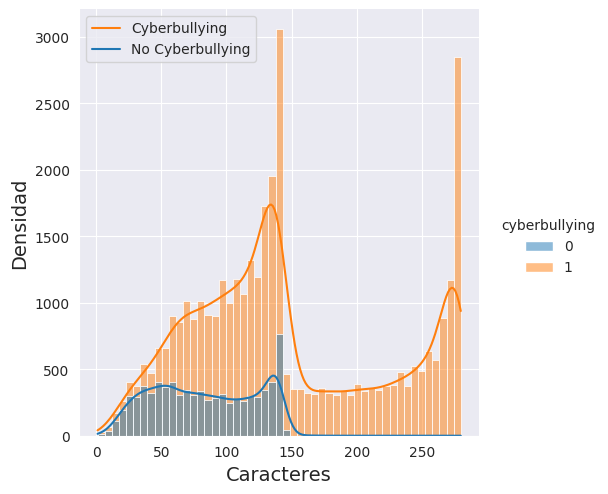

In [29]:
fig = plt.figure(figsize=(14, 12))
sns.set_style("darkgrid")
sns.displot(data=dataset, x="char_len", hue="cyberbullying", kde=True, legend=True)
plt.legend(["Cyberbullying", "No Cyberbullying"])
plt.xlabel('Caracteres', fontsize= 14)
plt.ylabel('Densidad', fontsize= 14)
plt.show()

Observamos que ahora la distribución de cyberbullying es bimodal y también que en los tweets que hacen referencia a cyberbullying tienden a ser más largos que los que no lo hacen.

## 3. Preprocesado y Normalización

### Normalización
- Eliminar espacios extra entre términos
- Transformar a minúsculas.
- Reemplazar contracciones del inglés
- Normalizar URLS y números
- Lematizar tokens, eliminar stopword y eliminar sígnos de puntación

In [40]:
!pip install contractions
import contractions

def eliminar_espacios(text):
  return " ".join(text.split())

def texto_to_lower(text):
  return text.lower()

def preprocess_text(text: str) -> str:
    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)

    # remove stopwords
    tokens = nltk.word_tokenize(text)
    text = " ".join(tokens)
    text = text.lower().strip()

    return text

def replace_contractions(text):
  return contractions.fix(text, slang=True)

In [32]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

def normalizar_tokens(documento):
  # Dividir en palabras
  palabras = tweet_tokenizer.tokenize(documento)
  # Reemplazar URLs, menciones de Twitter y número por tokens
  for i in range(len(palabras)):
    if palabras[i].startswith("http://") or palabras[i].startswith("https://") or palabras[i].startswith('www.'):
      palabras[i] = "URL"
    elif palabras[i].startswith("@"):
      palabras[i] = "MENTION"
    elif palabras[i].isdigit():
      palabras[i] = "NUM"

    # Unir palabras de nuevo en un documento modificado
    documento_modificado = ' '.join(palabras)
    return documento_modificado

In [44]:
#import sys
#!{sys.executable} -m pip install contractions
#import contractions
from tqdm.autonotebook import tqdm
tqdm.pandas()
# Eliminar Espacios
dataset["texto_normalizado"] = dataset["tweet_text"].progress_apply(lambda x: eliminar_espacios(x))
# Pasar a minuscula
dataset["texto_normalizado"] = dataset["texto_normalizado"].progress_apply(lambda x: texto_to_lower(x))
# Expandir contracciones
dataset["texto_normalizado"] = dataset["texto_normalizado"].progress_apply(lambda x: replace_contractions(x))
# Lidiar con Https: @, digitos y www.
dataset["texto_normalizado"] = dataset["texto_normalizado"].progress_apply(lambda x: normalizar_tokens(x))

  0%|          | 0/45314 [00:00<?, ?it/s]

  0%|          | 0/45314 [00:00<?, ?it/s]

  0%|          | 0/45314 [00:00<?, ?it/s]

  0%|          | 0/45314 [00:00<?, ?it/s]

In [48]:
# Crear nueva longitud de texto
dataset['char_len_normalizado'] = dataset['texto_normalizado'].apply(lambda x: len(x))
print(dataset["tweet_text"][522])
print(dataset["texto_normalizado"][522])

@SXOYXOS: Happy birthday @KierraLove2! Love you! (: Thanks girl love u too:)
MENTION : happy birthday @kierralove2 ! love you ! (: thanks girl love you too :)


Podemos observar que @SXOYXOS ha cambiado a "MENTION", las palabras y las palabras son minusculas.

Por ultimo haremos una lematización de las palabras para reducir la dimensionalidad y aumentar la eficiencia de nuestro posterior entrenamiento de modelo.

### Feature Engineering
Dado que nuestro texto ya esta normalizado, podemos hacer ingenieria de caracteristicas adicionales como el numero de menciones el numero de urls y la presencia de números.

In [51]:
def token_appearance(document, token = "MENTION"):
  return len([x for x in document.split() if x == token])

## Ingenieria de caracteristicas
dataset["num_mention"] = dataset["texto_normalizado"].progress_apply(lambda x: token_appearance(x, token="MENTION"))
dataset["num_URLS"] = dataset["texto_normalizado"].progress_apply(lambda x: token_appearance(x, token="URL"))
dataset["num_NUM"] = dataset["texto_normalizado"].progress_apply(lambda x: token_appearance(x, token="NUM"))

  0%|          | 0/45314 [00:00<?, ?it/s]

  0%|          | 0/45314 [00:00<?, ?it/s]

  0%|          | 0/45314 [00:00<?, ?it/s]

Por ultimo haremos una lematización del texto normalizado

In [57]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def lematizar_eliminacion_tokens(texto):
  doc = nlp(texto)
  lemas = [token.lemma_ for token in doc]
  # Esto es redundante dados los pasos anteriores
  tokens_filtrados = [token for token in lemas if token.isalpha() and token.lower() not in en_stopwords]
  texto_procesado = ' '.join(tokens_filtrados)
  return texto_procesado

dataset['texto_normalizado'] = dataset['texto_normalizado'].progress_apply(lambda x: lematizar_eliminacion_tokens(x))

  0%|          | 0/45314 [00:00<?, ?it/s]

<Figure size 1400x1200 with 0 Axes>

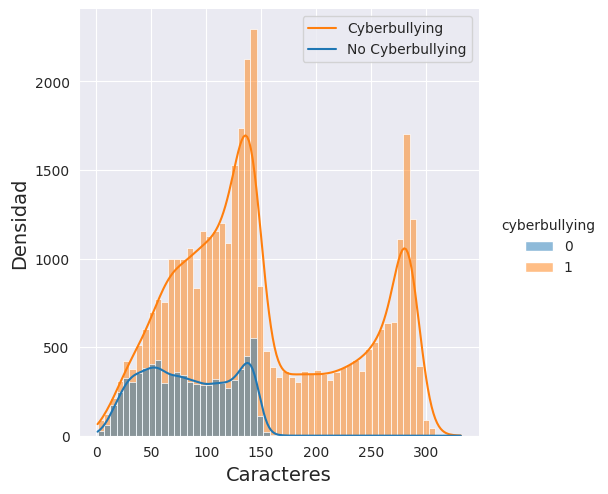

In [58]:
fig = plt.figure(figsize=(14, 12))
sns.set_style("darkgrid")
sns.displot(data=dataset, x="char_len_normalizado", hue="cyberbullying", kde=True, legend=True)
plt.legend(["Cyberbullying", "No Cyberbullying"])
plt.xlabel('Caracteres', fontsize= 14)
plt.ylabel('Densidad', fontsize= 14)
plt.show()

Vemos que no ha cambiado gran cosa en la distribución de la longitud de las palabras.

## 4. Vectorización

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Esta vectorizacion solo considerara aquellos lemas que salgan mas de un 0.5% en el document
vectorizacion = TfidfVectorizer(lowercase = False, stop_words = None,
                               min_df=0.005, ngram_range = (1,3))
vector_data = vectorizacion.fit_transform(dataset["texto_normalizado"])

In [65]:
vector_data ## 397 columnas

<45314x397 sparse matrix of type '<class 'numpy.float64'>'
	with 344886 stored elements in Compressed Sparse Row format>

In [66]:
extra_features = dataset[['num_mention', 'num_URLS', 'num_NUM']]

Index(['tweet_text', 'cyberbullying', 'char_len', 'texto_normalizado',
       'char_len_normalizado', 'num_mention', 'num_URLS', 'num_NUM'],
      dtype='object')

Utilizamos la librería scipy (función sparse.hstack) para unir las características TFIDF (contenidas en ´vector_data´) con las que acabamos de seleccionar (´extra_features´). Esta unión nos generará una matriz X que utilizaremos para hacer el train-test split posteriormente:

In [70]:
import scipy as sp
y = dataset['cyberbullying'].values.astype(np.float32)
X =sp.sparse.hstack((vector_data, extra_features.values), format='csr')
# Extraer nombres de caráteristicas
X_columns = list(vectorizacion.get_feature_names_out()) + extra_features.columns.tolist()

## 5. Entrenamiento y evaluación de modelos


In [71]:
X

<45314x400 sparse matrix of type '<class 'numpy.float64'>'
	with 355571 stored elements in Compressed Sparse Row format>

Tenemos 400 caracteristicas par 45314 documentos, 397 vienen de la lematización del texto y las 3 restantes son producto del feature engineering que hicimos `num_mention`, `num_URLS`, `num_NUM`

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

print(X_train.shape)
print(X_test.shape)

(33985, 400)
(11329, 400)


In [73]:
# Definimos las funcionalidades pertinentes de sklearn:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
# Definimos la función encargada de evaluar los modelos:
def model_evaluation(models, score, X, y):
      results = []
      names = []
      #PAra cada modelo
      for name, model in models:
          warnings.filterwarnings('ignore')
          # Generamos un StratifiedKFold
          KF = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 98)

          # hacemos croos_val
          cv_results = cross_val_score(model, X, y, cv = KF, scoring = score, verbose = False)

          # Guardamos los resultados:
          results.append(cv_results)
          names.append(name)

          # Mostramos los resultados numéricamente:
          print('Metric: {} , KFold '.format(str(score)))
          print("%s: %f (%f) " % (name, cv_results.mean(), cv_results.std()))

      return results, names

In [75]:
# Cargamos los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Definimos los modelos y generamos una lista con cada uno de ellos:
models = [
         ("Logistic",LogisticRegression(random_state=30)),
         ("GaussianNB",GaussianNB()),
         ("DecisionTreeClassifier", DecisionTreeClassifier(random_state=30))
]

evaluation_score = "accuracy"

model_evaluation(models,  evaluation_score, vector_data.toarray(), y)

Metric: accuracy , KFold 
Logistic: 0.853842 (0.003041) 
Metric: accuracy , KFold 
GaussianNB: 0.592245 (0.003434) 
Metric: accuracy , KFold 
DecisionTreeClassifier: 0.844463 (0.004023) 


([array([0.85269778, 0.85578727, 0.85148406, 0.85876641, 0.85047451]),
  array([0.58799515, 0.59163632, 0.58920887, 0.59593953, 0.5964467 ]),
  array([0.84067086, 0.84806356, 0.84729118, 0.84773254, 0.83855661])],
 ['Logistic', 'GaussianNB', 'DecisionTreeClassifier'])

## Evaluación

Observamos que el modelo Logístico tiene el puntaje más alto de precisión, segiudo cercanamente por el DecisionTreeClassifier.

### Optimización de hiperparámetros
Regresión Logística.

In [78]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Busqueda Grid
grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)

# Resultados
grid_result = grid_search.fit(X_train, y_train)
print("Mejor accuracy: %f usando los parámetros %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor accuracy: 0.856290 usando los parámetros {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


Listo el mejor modelo es una regresión logística utilizando una penalización L2 y un solver 'liblinear'.